# Objektorientierung: Eine Fallstudie

#### Teil 3: Abstrakte Klassen und Interfaces

In [4]:
%mavenRepo bintray https://dl.bintray.com/egp/maven
%maven ch.unibas.informatik:jturtle:0.5
import ch.unibas.informatik.jturtle.Turtle;

## Ziel:

In diesem dritten Teil der Fallstudie werden wir das Zeichenprogramm so erweitern, dass wir die Linienfarbe und Linienstärke verändern können. Um dies nicht für jedes Objekt separat machen zu müssen, führen wir eine abstrakte Klasse ```Shape``` ein. Ausserdem erweitern wir unsere Hierarchie noch um die Klasse ```Circle```. Dies ist unser erstes Objekt, welches kein Polygon ist. 

Am Ende wollen wir folgenden Testcode schreiben können. Unser Ziel ist aber, dass wir die Methode ```setLineColor``` und ```setLineWidth``` nicht für jedes Objekt einzeln implementieren müssen. 

```java
Line line = new Line(new Point(-30, 50), new Point(20, 60));

Rectangle rectangle = new Rectangle(new Point(-80, -90), 10, 100);
rectangle.setLineColor(java.awt.Color.BLUE);

Square square = new Square(new Point(30, -70), 40);

Triangle triangle = new Triangle(
    new Point(-30, -50), 
    new Point(0, 40), 
    new Point(30, -10)
);

triangle.setLineColor(java.awt.Color.GREEN);
triangle.setLineWidth(5);

Circle circle = new Circle(new Point(40,40), 10);
circle.setLineWidth(2);


Drawing drawing = new Drawing();

drawing.draw(line);
drawing.draw(rectangle);
drawing.draw(square);
drawing.draw(triangle);
drawing.draw(circle);
drawing.show();
```

Als Ausgabe soll dann folgendes Bild entstehen:
![drawing](images/drawing-final.png);

## Implementation

In [149]:
class Vector {
    double x;
    double y;
    
    Vector(double x, double y) {
        this.x = x;
        this.y = y;
    }
    
    double dotProd(Vector v) {
        return this.x * v.x + this.y * v.y;
    }
    
    double norm() {
        return Math.sqrt(this.x * this.x + this.y * this.y);
    }
}

class Point {
    
    double x;
    double y;
    
    Point(double x, double y) {
        this.x = x;
        this.y = y;
    }
    
    Vector minus(Point p) {
        return new Vector(this.x - p.x, this.y - p.y);
    }

}

In [150]:
abstract class Shape {

    java.awt.Color lineColor = java.awt.Color.BLACK;
    int lineWidth = 1;
    
    void setLineWidth(int width) {
        if (width <= 0) {
            this.lineWidth = 1;
        } else { 
            this.lineWidth = width;
        }                        
    }
    
    void setLineColor(java.awt.Color color) {
        this.lineColor = color;
    }
        
    abstract void drawWithTurtle(Turtle turtle);        
    
    
    void setTurtlePosition(Turtle turtle, Point p) {
        turtle.penUp();
        turtle.home();
        turtle.forward(p.y);
        turtle.turnRight(90);
        turtle.forward(p.x);
        turtle.turnLeft(90);
        turtle.penDown();
    }
    
    void setTurtleAttributes(Turtle turtle) { 
       turtle.penColor(lineColor);
       turtle.penSize(lineWidth);
    }
    
}

In [151]:
class Line extends Shape {

    Point p1;
    Point p2;
    
    Line(Point p1, Point p2) {
        this.p1 = p1;
        this.p2 = p2;
    }
    
        
    void drawWithTurtle(Turtle turtle) {
        setTurtlePosition(turtle, p1);
        setTurtleAttributes(turtle);
        
        turtle.penDown();
        
        Vector v = p2.minus(p1);
        Vector e2 = new Vector(0, 1);
        
        double angle = Math.acos(v.dotProd(e2) / (v.norm() * e2.norm()));
        double angleInDegree = angle * 360 / (2 * 3.14157);
        if (v.x > 0) {
            turtle.turnRight(angleInDegree);
        } else {
            turtle.turnLeft(angleInDegree);
        }
        turtle.forward(v.norm());
    }    
    
}

In [152]:
abstract class Polygon extends Shape {
    
    Point[] points;
    
    Polygon(Point[] points) {
        this.points = points;
    }
    
    void drawWithTurtle(Turtle turtle) {
        
        for (int i = 0; i < points.length; i++) {
            Line line = new Line(points[i], points[(i + 1) % points.length]);
            line.setLineColor(this.lineColor);
            line.setLineWidth(this.lineWidth);
            line.drawWithTurtle(turtle);
        }        
    }        
}

In [153]:
class Triangle extends Polygon {
    
    Triangle(Point p1, Point p2, Point p3) {
        super(new Point[]{p1, p2, p3});                
    }
}

In [154]:
class Rectangle extends Polygon {
    
    Point lowerLeftCorner;
    
    Rectangle(Point lowerLeftCorner, double width, double height) {
        
        super(getCornerPoints(lowerLeftCorner, width, height));                
        
    }
    
    static Point[] getCornerPoints(Point lowerLeftCorner, double width, double height) { 
        Point[] cornerPoints = new Point[4];
        cornerPoints[0] = lowerLeftCorner;
        cornerPoints[1] = new Point(lowerLeftCorner.x, lowerLeftCorner.y + height);
        cornerPoints[2] = new Point(lowerLeftCorner.x + width, lowerLeftCorner.y + height);
        cornerPoints[3] = new Point(lowerLeftCorner.x + width, lowerLeftCorner.y);
        return cornerPoints;
    }
    
}

In [155]:
class Square extends Rectangle {
    Square(Point lowerLeftCorner, double length) {
        super(lowerLeftCorner, length, length);
    }
}

In [156]:
class Circle extends Shape {
    
    double radius;
    Point center;
    
    public Circle(Point center, double radius) {
        this.radius = radius;
        this.center = center;
    }
    
    void drawWithTurtle(Turtle turtle) {
        setTurtlePosition(turtle, new Point(center.x - radius, center.y));
        setTurtleAttributes(turtle);
                
        turtle.penDown();
        double circumference = 2 * 3.1415926 * radius;
        double forwardStep = circumference / 360;
        for (int i = 0; i < 360; i++) {
            turtle.forward(forwardStep);
            turtle.turnRight(1);
        }
    }
}

In [157]:
class Drawing {

    Turtle turtle;
    
    Drawing() {
        this.turtle = new Turtle();
    }
    
    void draw(Shape shape) {
        shape.drawWithTurtle(turtle);
    }    
    
    void show() {
        display(turtle.toImage());
    }
    
}

#### Testprogramm

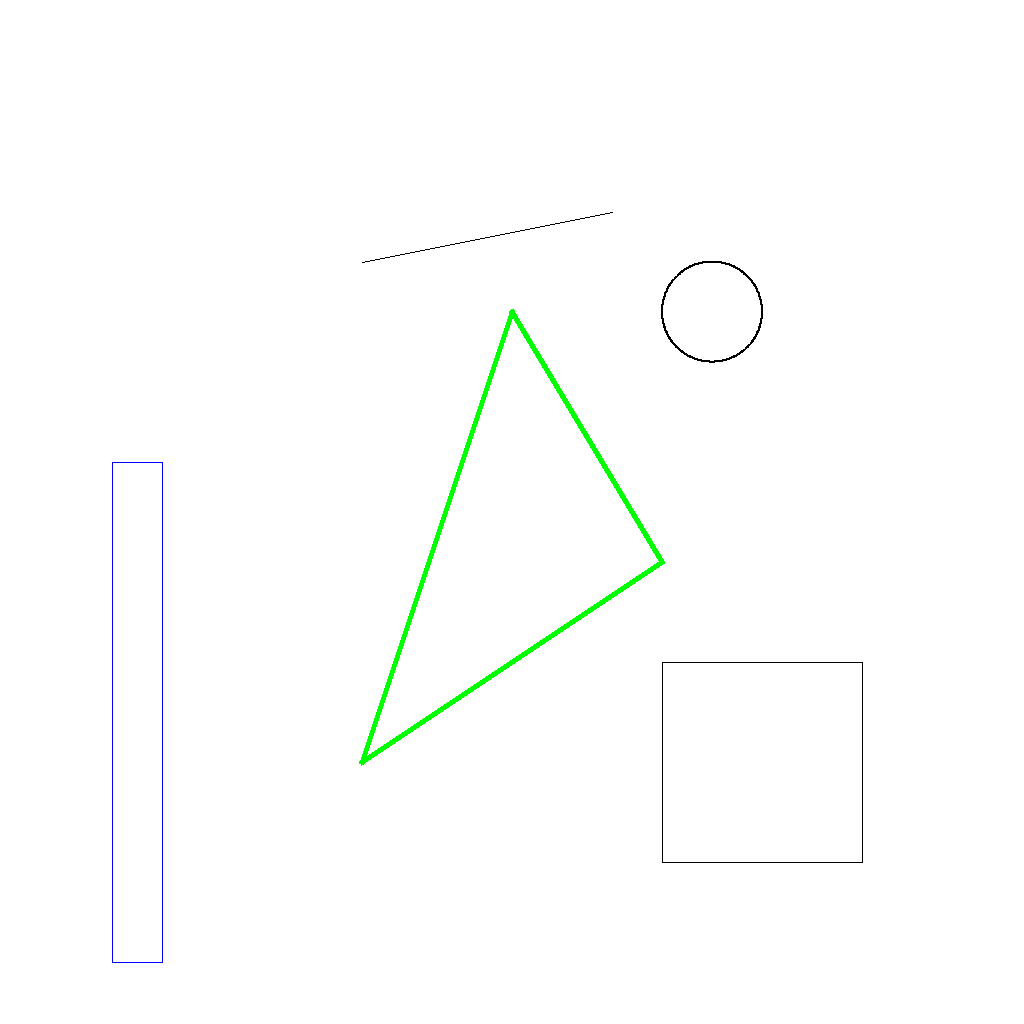

In [158]:

Line line = new Line(new Point(-30, 50), new Point(20, 60));

Rectangle rectangle = new Rectangle(new Point(-80, -90), 10, 100);
rectangle.setLineColor(java.awt.Color.BLUE);

Square square = new Square(new Point(30, -70), 40);

Triangle triangle = new Triangle(
    new Point(-30, -50), 
    new Point(0, 40), 
    new Point(30, -10)
);

triangle.setLineColor(java.awt.Color.GREEN);
triangle.setLineWidth(5);

Circle circle = new Circle(new Point(40,40), 10);
circle.setLineWidth(2);


Drawing drawing = new Drawing();

drawing.draw(line);
drawing.draw(rectangle);
drawing.draw(square);
drawing.draw(triangle);
drawing.draw(circle);
drawing.show();
